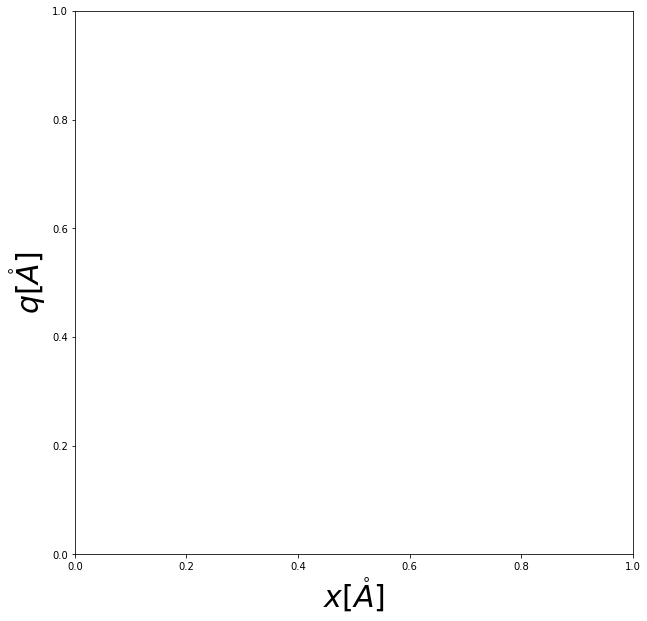

interactive(children=(FloatSlider(value=-0.3, description='a', max=-0.01, min=-0.3, step=0.05), FloatSlider(va…

<function __main__.plot_analytical(a, b, s)>

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import scipy as sc
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import random as rnd
from scipy.optimize import minimize
import scipy.linalg
from scipy.optimize import Bounds
import multiprocessing

#import warnings
#warnings.filterwarnings("ignore")

%matplotlib inline

#numerical minimization parameters
#number of points in grid
nsteps = 200
#length between grid points
dx = 1.5
#amplitude of initial uniform q
q_init = 1
#scf convergence threshold
scf_conv = 1e-4

#volume of unit cell in angstrom cubed for volume normalization
volume = 7.3236460686 * 7.7495899200 * 7.3236460686


#_________________________________PARAMETERS__________________________________________#

#Landau parameters for 6th order fit
a = -0.219
b = 0.388

#Ginzburg parameter
s = 223.879619

ry_to_mev = 13.605698066 * 1000
ry_to_thz = 3289.845
thz_to_mev = 0.00414E3
aut_to_a = 0.5291772083


#__________________________ISING/NO CHARGE______________________________#

    

#____________NUMERICAL______________#
#Q = np.zeros(nsteps) - q_init
#Q[int(Q.size/2) : Q.size] = q_init

#x grid of size nsteps*dx centered at 0
x = np.linspace(0, nsteps*dx, nsteps)
x -= x[x.size - 1] / 2 

#def Landau_Ginzburg(Q):
#    d_Q = np.diff(Q)/dx
#    d_Q = np.append(d_Q, d_Q[0])
#    E_tot = 0
#    for i in range(0, Q.size - 1):
#        Landau = a*(Q[i]**2) + b*(Q[i]**4)
#        Ginzburg = s * (d_Q[i]**2)
#        E_tot += (Landau + Ginzburg) * dx
#    return E_tot
#
#Q_min = minimize(Landau_Ginzburg, Q, method='BFGS')
#Q_min = Q_min.x

plt.figure(1, figsize=[10,10])
plt.xlabel(r'$x [\mathring{A}]$', fontsize=30)
plt.ylabel(r'$q [\mathring{A}]$', fontsize=30)
    
#____________ANALYTICAL______________#
    epsilon = np.sqrt(-s / a)
    Q0 = np.sqrt(-a / (2* b))    
    analytical = np.array(Q0*np.tanh(x/(np.sqrt(2)*epsilon)))
    
    
    #_______________PLOT_________________#    
    
    #plt.plot(x, Q_min, color='blue', linewidth=5, label='numerical')
    plt.plot(x, analytical, color='red', linestyle='-', linewidth=5, label='analytical')
    


    plt.show()
    
interact(plot_analytical, a=ipywidgets.FloatSlider(min=-0.3, max=-0.01, step=0.05, value=-1),
                          b=ipywidgets.FloatSlider(min=0.01, max=0.3, step=0.05, value=0.01),
                          s=ipywidgets.IntSlider(min=1, max=200, step=40, value=1))
